# 1 - Récupération des données

Les réglementations étant assez vastes, nous allons dans un premier temps nous concentrer sur les réglementations liées à la sécurité incendie.

Cette dernière est propre aux types d'ouvrages construits parmi lesquels nous retrouvons :
- les ERT ou établissement recevant des travailleurs
- les ERP ou établissement recevant du publics
- les batiments d'habitation
(etc) et tous ont leurs propres lois et décrets.

In [79]:
# Import des bibliothèques

import pandas as pd
import numpy as np
import dateparser

import requests
from bs4 import BeautifulSoup

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [67]:
pip install dateparser

  Using cached dateparser-1.2.0-py2.py3-none-any.whl.metadata (28 kB)
Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1-1 Analyse des données du Code du travail (ERT)

### 1-1-1 Scrapping de Legifrance

In [58]:
url = "https://www.legifrance.gouv.fr/codes/section_lc/LEGITEXT000006072050/LEGISCTA000018488606/#LEGISCTA000018532586"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    data = []
    titre = None  
    chapitre = None  
    section = None 

    for span in soup.find_all('span', {'data-anchor': True}):
        text = span.get_text(strip=True)

        if "Titre" in text:  
            titre = text
            chapitre = None 
            csection = None
        elif "Chapitre" in text and titre: 
            chapitre = text
            section = None  
        elif "Section" in text and titre and chapitre:  
            section = text

            articles = span.find_parent('li').find_all('article', class_="js-child list-article-consommation")
            
            for article in articles:
                article_name_tag = article.find('a', href=lambda x: x and 'codes/article_lc' in x)
                article_name = article_name_tag.get_text(strip=True) if article_name_tag else 'Article non disponible'

                decree = article.find('a', href=lambda x: x and '/loda/id/' in x)
                decree_text = decree.get_text(strip=True) if decree else 'Décret non disponible'

                content_div = article.find('div', class_='content')
                content = content_div.get_text(separator="\n", strip=True) if content_div else 'Contenu non disponible'

                data.append({
                    'Titre': titre,
                    'Chapitre': chapitre,
                    'Section': section,
                    'Article': article_name,
                    'Décret': decree_text,
                    'Contenu': content
                })

    df_final = pd.DataFrame(data)
    display(df_final)

else:
    print("Erreur lors du chargement :", response.status_code)


,Titre,Chapitre,Section,Article,Décret,Contenu
0,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-1,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Les dispositions du présent titre déterminent,..."
1,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-2,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Pour l'application du présent titre, on entend..."
2,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-3,Modifié par Décret n°2011-1461\n du 7 novembre...,Le maître d'ouvrage élabore et transmet aux ut...
3,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-4,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...
4,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-5,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...
...,...,...,...,...,...,...
281,Titre II : Obligations de l'employeur pour l'u...,"Chapitre VIII : Installations sanitaires, res...",Section 3 : Hébergement (Articles R4228-26 à R...,Article R4228-33,Création Décret n°2008-244 du 7 mars 2008 - ar...,Des lavabos à eau potable et à température rég...
282,Titre II : Obligations de l'employeur pour l'u...,"Chapitre VIII : Installations sanitaires, res...",Section 3 : Hébergement (Articles R4228-26 à R...,Article R4228-34,Création Décret n°2008-244 du 7 mars 2008 - ar...,Des cabinets d'aisance et des urinoirs sont in...
283,Titre II : Obligations de l'employeur pour l'u...,"Chapitre VIII : Installations sanitaires, res...",Section 3 : Hébergement (Articles R4228-26 à R...,Article R4228-35,Création Décret n°2008-244 du 7 mars 2008 - ar...,Des douches à température réglable sont instal...
284,Titre II : Obligations de l'employeur pour l'u...,"Chapitre VIII : Installations sanitaires, res...",Section 3 : Hébergement (Articles R4228-26 à R...,Article R4228-36,Modifié par Ordonnance n°2010-462 du 6 mai 201...,Les dispositions des articles\nR. 4228-26 à R....


### 1-1-2 Pre-processing des données

In [48]:
df_final.info()
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Titre     286 non-null    object
 1   Chapitre  286 non-null    object
 2   Section   286 non-null    object
 3   Article   286 non-null    object
 4   Décret    286 non-null    object
 5   Contenu   286 non-null    object
dtypes: object(6)
memory usage: 13.5+ KB


,Titre,Chapitre,Section,Article,Décret,Contenu
count,286,286,286,286,286,286
unique,2,12,53,286,31,286
top,Titre II : Obligations de l'employeur pour l'u...,Chapitre VII : Risques d'incendies et d'explos...,Section 1 : Installations sanitaires (Articles...,Article R4211-1,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Les dispositions du présent titre déterminent,..."
freq,190,57,18,1,201,1


In [49]:
print('Analyse d occurence des Titres du Livre II :\n', df_final['Titre'].value_counts())
print('\n')
print('Analyse d occurence des Chapitres :\n', df_final['Chapitre'].value_counts())

Analyse d occurence des Titres du Livre II :
 Titre
Titre II : Obligations de l'employeur pour l'utilisation des lieux de travail  (Articles R4221-1 à R4228-37)         190
Titre Ier : Obligations du maître d'ouvrage pour la conception des lieux de travail  (Articles R4211-1 à R4217-2)     96
Name: count, dtype: int64


Analyse d occurence des Chapitres :
 Chapitre
Chapitre VII : Risques d'incendies et d'explosions et évacuation (Articles R4227-1 à R4227-57)                 57
Chapitre VI : Risques d'incendies et d'explosions et évacuation (Articles R4216-1 à R4216-34)                  37
Chapitre VIII : Installations sanitaires,  restauration et hébergement (Articles R4228-1 à R4228-37)           37
Chapitre IV : Sécurité des lieux de travail (Articles R4214-1 à R4214-28)                                      28
Chapitre II : Aération, assainissement (Articles R4222-1 à R4222-26)                                           26
Chapitre IV : Sécurité des lieux de travail (Articles R4224-1 

In [59]:
df_final['Numéro Décret'] = df_final['Décret'].str.extract(r'n°(\d+-\d+)')
df_final.head()
# pas tout à fait vrai pour modifie le ...

,Titre,Chapitre,Section,Article,Décret,Contenu,Numéro Décret
0,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-1,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Les dispositions du présent titre déterminent,...",2008-244
1,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-2,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Pour l'application du présent titre, on entend...",2008-244
2,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-3,Modifié par Décret n°2011-1461\n du 7 novembre...,Le maître d'ouvrage élabore et transmet aux ut...,2011-1461
3,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-4,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244
4,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-5,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244


In [70]:
df_final['Date decret'] = df_final['Décret'].str.extract(r'du\s+(.+?)\s+-')
df_final['Date decret'] = df_final['Date decret'].astype(str).apply(lambda x: dateparser.parse(x) if x != 'nan' else None)
df_final.head()

,Titre,Chapitre,Section,Article,Décret,Contenu,Numéro Décret,Date decret
0,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-1,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Les dispositions du présent titre déterminent,...",2008-244,2008-03-07
1,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-2,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Pour l'application du présent titre, on entend...",2008-244,2008-03-07
2,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-3,Modifié par Décret n°2011-1461\n du 7 novembre...,Le maître d'ouvrage élabore et transmet aux ut...,2011-1461,2011-11-07
3,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-4,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244,2008-03-07
4,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-5,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244,2008-03-07


In [72]:
df_final['Annee decret'] = df_final['Date decret'].dt.year.fillna(0).astype(int)
df_final.head()

,Titre,Chapitre,Section,Article,Décret,Contenu,Numéro Décret,Date decret,Annee decret
0,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-1,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Les dispositions du présent titre déterminent,...",2008-244,2008-03-07,2008
1,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 1 : Champ d'application et définitions...,Article R4211-2,Création Décret n°2008-244 du 7 mars 2008 - ar...,"Pour l'application du présent titre, on entend...",2008-244,2008-03-07,2008
2,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-3,Modifié par Décret n°2011-1461\n du 7 novembre...,Le maître d'ouvrage élabore et transmet aux ut...,2011-1461,2011-11-07,2011
3,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-4,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244,2008-03-07,2008
4,Titre Ier : Obligations du maître d'ouvrage po...,Chapitre Ier : Principes généraux (Articles R4...,Section 2 : Dossier de maintenance (Articles R...,Article R4211-5,Création Décret n°2008-244 du 7 mars 2008 - ar...,Le dossier de maintenance des lieux de travail...,2008-244,2008-03-07,2008


C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


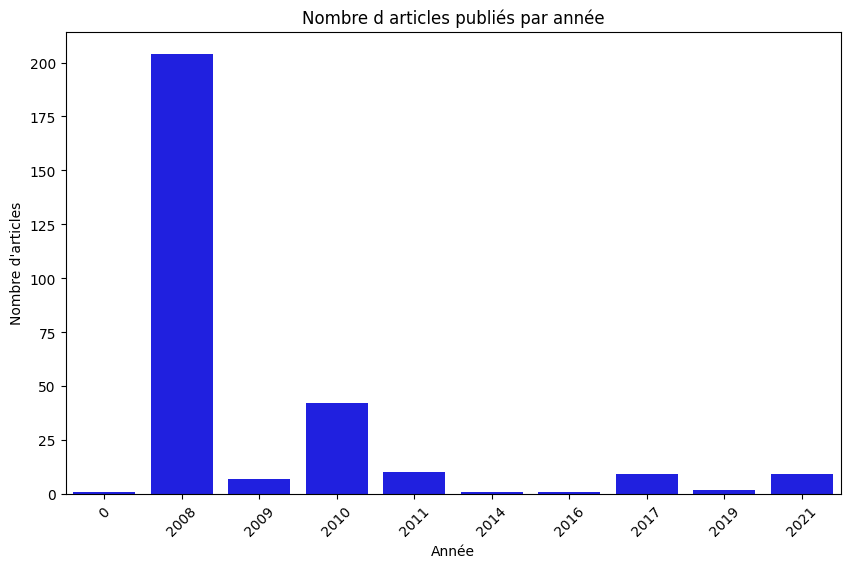

In [83]:
df_final['Annee decret'] = pd.Categorical(df_final['Annee decret'], ordered=True, categories=sorted(df_final['Annee decret'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Annee decret', color='blue')
plt.title("Nombre d articles publiés par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


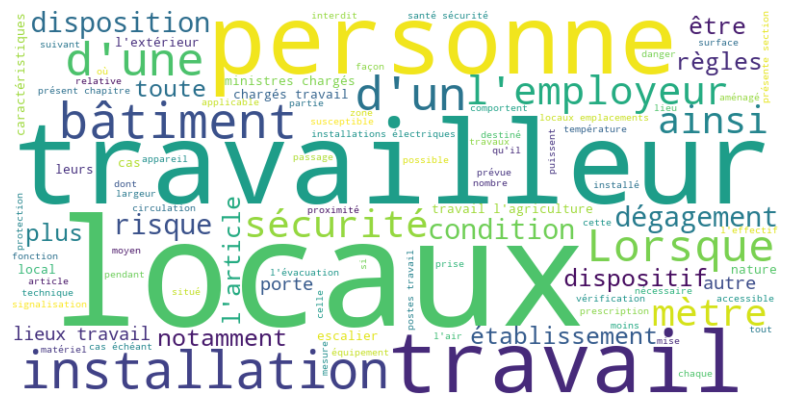

In [82]:
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

text = " ".join(str(contenu) for contenu in df_final['Contenu'])

filtered_text = " ".join([word for word in text.split() if word.lower() not in stop_words])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 1-2 Analyse des données des Etablissements recevant du public (ERP)

## 1-3 Analyse des données du Code de la construction et de l’habitation (CCH)